#**BUILDING CNN MODEL FOR IMAGE CLASSIFIACTION**

##**Image Augmentation**

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
x_train = train_datagen.flow_from_directory(r'/content/drive/MyDrive/assign.3.dataset/flowers',target_size=(64,64),class_mode='categorical')

Found 4317 images belonging to 5 classes.


In [27]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

##**Creating Model**

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Dense,Flatten

In [31]:
model=Sequential()

##**Add Layers (Convolution,MaxPooling,Flatten,Dense-(HiddenLayers),Output)**

In [32]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) # Convolution layer
model.add(MaxPooling2D(pool_size=(2,2))) # Max pooling layer
model.add(Flatten()) # Flatten layer
# Dense layers
model.add(Dense(300,activation='relu')) # Hidden layer
model.add(Dense(150,activation='relu')) # Hidden layer
model.add(Dense(5,activation='softmax')) # Output layer

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 30752)             0         
                                                                 
 dense_6 (Dense)             (None, 300)               9225900   
                                                                 
 dense_7 (Dense)             (None, 150)               45150     
                                                                 
 dense_8 (Dense)             (None, 5)                 755       
                                                      

##**Compile the Model**

In [34]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

##**Fitting the Model**

In [35]:
model.fit(x_train, epochs = 10,steps_per_epoch=len(x_train))

Epoch 1/10
135/135 [==============================] - 46s 333ms/step - loss: 1.2276 - accuracy: 0.4922
Epoch 2/10
135/135 [==============================] - 45s 335ms/step - loss: 0.9983 - accuracy: 0.6125
Epoch 3/10
135/135 [==============================] - 46s 338ms/step - loss: 0.9083 - accuracy: 0.6507
Epoch 4/10
135/135 [==============================] - 45s 332ms/step - loss: 0.8446 - accuracy: 0.6759
Epoch 5/10
135/135 [==============================] - 45s 333ms/step - loss: 0.7881 - accuracy: 0.6977
Epoch 6/10
135/135 [==============================] - 46s 337ms/step - loss: 0.7372 - accuracy: 0.7234
Epoch 7/10
135/135 [==============================] - 46s 340ms/step - loss: 0.6991 - accuracy: 0.7385
Epoch 8/10
135/135 [==============================] - 46s 339ms/step - loss: 0.6466 - accuracy: 0.7540
Epoch 9/10
135/135 [==============================] - 44s 327ms/step - loss: 0.6147 - accuracy: 0.7737
Epoch 10/10
135/135 [==============================] - 45s 336ms/step - l

##**Saving the Model**

In [36]:
model.save('flowers.h5')

##**Testing the Model**

In [53]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [54]:
model=load_model('flowers.h5')

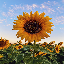

In [70]:
img = image.load_img(r'/content/drive/MyDrive/assign.3.dataset/test.jpg',target_size=(64,64))
img

In [71]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [72]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x))
y


3

In [73]:
index=['daisy','dandelion','rose','sunflower','tulip']
index[y]

'sunflower'

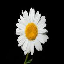

In [74]:
img1 = image.load_img(r'/content/drive/MyDrive/assign.3.dataset/test1.jpg',target_size=(64,64))
img1

In [75]:
x=image.img_to_array(img1)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x))
index[y]

'daisy'

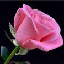

In [77]:
img2 = image.load_img(r'/content/drive/MyDrive/assign.3.dataset/test2.jpg',target_size=(64,64))
img2

In [78]:
x=image.img_to_array(img2)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x))
index[y]

'rose'

###With training and testing data

In [79]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
import splitfolders

In [81]:
splitfolders.ratio("/content/drive/MyDrive/assign.3.dataset/flowers", output="/content/drive/MyDrive/assign.3.dataset", ratio=(.8, .2), group_prefix=None, move=False)

Copying files: 4317 files [01:10, 61.12 files/s]


In [82]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)

In [83]:
x_train = train_datagen.flow_from_directory(r'/content/drive/MyDrive/assign.3.dataset/train',target_size=(64,64),class_mode='categorical')

Found 3452 images belonging to 5 classes.


In [84]:
x_test=test_datagen.flow_from_directory(r'/content/drive/MyDrive/assign.3.dataset/val',target_size=(64,64),class_mode='categorical')

Found 865 images belonging to 5 classes.


In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Dense,Flatten

In [86]:
model=Sequential()

In [87]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) # Convolution layer
model.add(MaxPooling2D(pool_size=(2,2))) # Max pooling layer
model.add(Flatten()) # Flatten layer
# Dense layers
model.add(Dense(300,activation='relu')) # Hidden layer
model.add(Dense(150,activation='relu')) # Hidden layer
model.add(Dense(5,activation='softmax')) # Output layer

In [88]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 30752)             0         
                                                                 
 dense_9 (Dense)             (None, 300)               9225900   
                                                                 
 dense_10 (Dense)            (None, 150)               45150     
                                                                 
 dense_11 (Dense)            (None, 5)                 755       
                                                      

In [89]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [90]:
model.fit(x_train, epochs = 10, validation_data=x_test, steps_per_epoch=len(x_train), validation_steps=len(x_test))

Epoch 1/10
108/108 [==============================] - 45s 413ms/step - loss: 1.4393 - accuracy: 0.4122 - val_loss: 1.3110 - val_accuracy: 0.4809
Epoch 2/10
108/108 [==============================] - 42s 392ms/step - loss: 1.0584 - accuracy: 0.5820 - val_loss: 1.1459 - val_accuracy: 0.5457
Epoch 3/10
108/108 [==============================] - 42s 387ms/step - loss: 0.9513 - accuracy: 0.6353 - val_loss: 1.2169 - val_accuracy: 0.5353
Epoch 4/10
108/108 [==============================] - 47s 433ms/step - loss: 0.8961 - accuracy: 0.6498 - val_loss: 1.0100 - val_accuracy: 0.6220
Epoch 5/10
108/108 [==============================] - 42s 387ms/step - loss: 0.8260 - accuracy: 0.6779 - val_loss: 0.9960 - val_accuracy: 0.6312
Epoch 6/10
108/108 [==============================] - 43s 398ms/step - loss: 0.7853 - accuracy: 0.6976 - val_loss: 0.9918 - val_accuracy: 0.6231
Epoch 7/10
108/108 [==============================] - 42s 386ms/step - loss: 0.7340 - accuracy: 0.7202 - val_loss: 1.0139 - val_ac

In [91]:
model.save('flowers.h5')

In [92]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [93]:
model=load_model('flowers.h5')

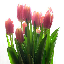

In [102]:
img = image.load_img(r'/content/drive/MyDrive/assign.3.dataset/val/tulip/112428665_d8f3632f36_n.jpg',target_size=(64,64))
img

In [103]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [104]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x))
y

4

In [105]:
index=['daisy','dandelion','rose','sunflower','tulip']
index[y]

'tulip'